In [1]:
import pandas
import matplotlib.pyplot as plt


In [69]:
batch_data = pandas.read_csv('/Users/tylerskluzacek/Downloads/serverless-batching-numbers - Sheet1.csv')
batch_data['spf'] = batch_data['Completion Time'] / batch_data['BatchSize']


In [70]:
# print(batch_data)
sampler_data = batch_data[batch_data.Extractor == 'Sampler']
matio_data = batch_data[batch_data.Extractor == 'Materials']
images_data = batch_data[batch_data.Extractor == 'Images']
keyword_data = batch_data[batch_data.Extractor == 'Freetext']


print(keyword_data)

   Extractor  BatchSize  Completion Time  Files per sec       spf
18  Freetext          1         0.709278       1.409884  0.709278
19  Freetext          2         1.002258       1.995494  0.501129
20  Freetext          4         1.316883       3.037475  0.329221
21  Freetext          8         2.250706       3.554441  0.281338
22  Freetext         16         4.062872       3.938101  0.253930
23  Freetext         32         7.572810       4.225644  0.236650
24  Freetext         64        14.616618       4.378578  0.228385
25  Freetext        128        28.751707       4.451910  0.224623
26  Freetext        256        58.278915       4.392669  0.227652


In [13]:
batch_size = sampler_data['BatchSize']
sampler_fps = sampler_data['Files per sec']
matio_fps = matio_data['Files per sec']
images_fps = images_data['Files per sec']
keyword_fps = keyword_data['Files per sec']

In [14]:
print(batch_size)

0      1
1      2
2      4
3      8
4     16
5     32
6     64
7    128
8    256
Name: BatchSize, dtype: int64


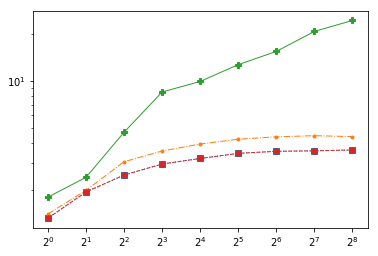

In [50]:
plt.plot(batch_size, sampler_fps, linewidth=1, linestyle=':', marker="s")
plt.plot(batch_size, keyword_fps, linewidth=1, linestyle='-.', marker=".")
plt.plot(batch_size, matio_fps, linewidth=1, linestyle='-', marker="P")
plt.plot(batch_size, sampler_fps, linewidth=1, linestyle='--', marker='h')
plt.xscale('log', basex=2)
plt.yscale('log', basey=10)
plt.show()

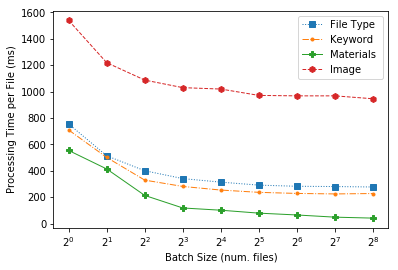

In [90]:
batch_size = sampler_data['BatchSize']
sampler_spf = sampler_data['spf']*1000
matio_spf = matio_data['spf']*1000
images_spf = images_data['spf']*1000
keyword_spf = keyword_data['spf']*1000


plt.plot(batch_size, sampler_spf, linewidth=1, linestyle=':', marker="s", label="File Type")
plt.plot(batch_size, keyword_spf, linewidth=1, linestyle='-.', marker=".", label="Keyword")
plt.plot(batch_size, matio_spf, linewidth=1, linestyle='-', marker="P", label="Materials ")
plt.plot(batch_size, images_spf, linewidth=1, linestyle='--', marker='h', label="Image")
plt.xscale('log', basex=2)
plt.ylabel("Processing Time per File (ms)")
plt.xlabel("Batch Size (num. files)")

plt.legend(loc='upper right')

# plt.title("Batching: Time per File Processed (ms)")
# plt.yscale('log', basey=10)
plt.savefig('batch-times.jpg', dpi=1000)
# plt.show()